In [40]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import math
import matplotlib.pyplot as plt

In [26]:
"""Data Preprocess"""

train = pd.read_csv("train.csv", encoding = 'MS950');
# 抓取 每日PM2.5
pm = train[train["測項"]=="PM2.5"].copy()
pm.drop(['日期','測站','測項'],axis=1,inplace=True)

x=[]# x,y為list
y=[]


for i in range(15):
    temx=pm.iloc[:,i:i+9] #temx: keep i~i+8 o'clock
    temx.columns=np.array(range(9))
    temy=pm.iloc[:,i+9] #temy: keep i+9 o'clock
    temy.columns=np.array(range(1))
    x.append(temx) # x = [[eveday 0-8], ..., [eveday 14-22]]
    y.append(temy) # y = [[eveday 9], ..., [eveday 23]]

x=pd.concat(x) # merge x to a dataframe
y=pd.concat(y) # merge y to a series
x=np.array(x,float) # convert to a numpy array
y=np.array(y,float)

# save
np.save("x.npy",x)
np.save("y.npy",y)

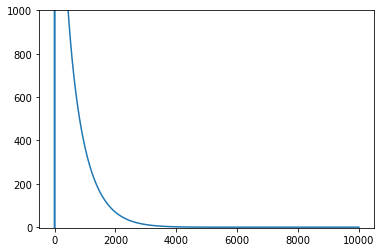

In [38]:
x = np.load("x.npy")
y = np.load("y.npy")

# add a bias series all valued 1 to x
x = np.concatenate((np.ones((x.shape[0],1)),x), axis=1)
# initial
w = np.zeros(len(x[0]))
l_rate = 10
repeat = 10000
s_grad = np.zeros(len(x[0]))
x_t = x.transpose()
# To show Loss
lossrec=[]


# training
for i in range(repeat):
    tem = np.dot(x,w)
    loss = y - tem
    lossrec.append(np.sum(loss, axis = 0))
    # adagrad
    grad = np.dot(x_t,loss) * (-2)
    s_grad += grad**2
    ada = np.sqrt(s_grad)
    w = w - l_rate * grad / ada
    
# loss
plt.plot(lossrec)
plt.ylim(-3,1000)
plt.show()

# save
np.save("model.npy",w)

In [46]:
model = np.load("model.npy")
test = pd.read_csv("test.csv")
t = test[test["AMB_TEMP"]=="PM2.5"].copy()
t.drop(["id_0","AMB_TEMP"],axis=1,inplace=True)
t = np.array(t,float)
t = np.concatenate((np.ones((t.shape[0],1)),t), axis=1)
res = []
res = np.dot(t,w)
res

array([ 27.41442114,  61.55576434,  20.49803196,  29.53443361,
        10.79767011,  36.20720196,  39.7163839 ,  16.57175712,
        48.23627374,  33.98378897,  39.25396544,  58.48319052,
        37.23356467,  41.66913212,  27.55246309,  13.1889624 ,
        52.30029122,  23.63327639,  19.7662073 ,  20.51352232,
        15.66268864,  28.49276165,  38.03477309,  11.08073866,
        58.24257196,  44.53164349,  28.87672212,   9.80659247,
        29.69971845,  36.35090639,  19.43428788,  12.71486259,
        17.0117771 ,   8.62668932,  18.82222166,  38.66455325,
        20.08402335,  28.39280922,   6.94419602,  59.68906378,
        46.63323825,  17.28591502,  49.70855984,  18.98558771,
        44.15939046,  51.19898476,  61.64642457,  40.29588702,
        51.04026409,  42.08154294,  30.7565433 ,  25.43723702,
        41.07801634,  26.36300435,  38.24278214,  39.90044155,
        25.70020226,  22.49555053,  37.45505336,  31.50166898,
        15.99339805,  23.13494156,  31.72293469,  55.05